In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads.csv')
# dataset = dataset_original.copy()
# Viewing top 5 rows
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
# information about dataset
dataset.info()
print('Dataset shape: ', dataset.shape, sep="") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB
Dataset shape: (10000, 10)


In [4]:
# Finding if there are null values in the dataset
dataset.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

In [5]:
# total rows per Ad
dataset.count()

Ad 1     10000
Ad 2     10000
Ad 3     10000
Ad 4     10000
Ad 5     10000
Ad 6     10000
Ad 7     10000
Ad 8     10000
Ad 9     10000
Ad 10    10000
dtype: int64

# Using UCB

In [6]:
# Getting the total number of rows
N = len(dataset)
# Getting the total number of columns
d = len(dataset.columns)
# ads_selected used to append the different types of ads selected in each round 
ads_selected = []
# numbers_of_selections is used to count the number of time an ad was selected 
numbers_of_selections = [0] * d  # [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# sums_of_rewards is used to calculate the cumulative sum of rewards at each round
sums_of_rewards = [0] * d  # [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total_reward = 0

In [7]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

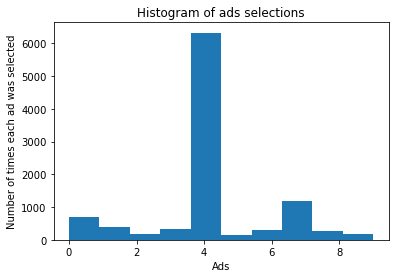

In [8]:
# Plotting a histogram of the ads selection
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [13]:
# Finding which ad has the most rewards, added + 1 since it start index 0
sums_of_rewards.index(max(sums_of_rewards)) + 1

5

# Using Thompson-Sampling
It is called sampling because it picks random samples from a probability distribution for each arm.

#### Thompson-Sampling VS Upper Confidence Bound
UCB is a deterministic algorithm whereas Thompson sampling is a probabilistic algorithm. In UCB you must incorporate the value at every round, you cannot proceed to the next round without adjusting the value. In Thompson, you can accommodate delayed feedback. This means you can update the dataset for your multi-armed bandit problem in a batch manner, that will save your additional computing resource or cost of updating the dataset each time. This is the main advantage of Thompson sampling over UCB.

In [17]:
# Getting the total number of rows
N = len(dataset)
# Getting the total number of columns
d = len(dataset.columns)
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward


In [21]:
# Finding which ad has the most rewards, added + 1 since it start index 0
sums_of_rewards.index(max(sums_of_rewards)) + 1

5

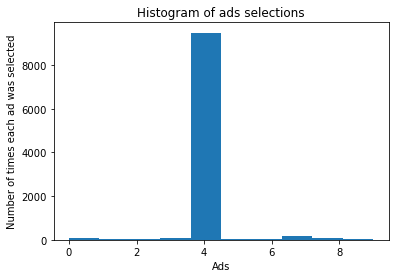

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()